<a href="https://colab.research.google.com/github/my-TensorFlow-certification/projects/blob/main/CP_SKIM_LIT_Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct 

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign


dev.txt  test.txt  train.txt


In [3]:
data_dir='pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'
import os 
filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [4]:
def get_lines(filename):
  with open(filename,"r") as f :
    return f.readlines()

In [5]:
get_lines('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [6]:
def preprocess_text_with_line_numbers(filename):
  input_lines=get_lines(filename)
  abstract_lines=""
  abstract_samples=[]

  for line in input_lines:
    if line.startswith("###"):
      abstract_id=line
      abstract_lines=""
    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()

      for abstract_line_number,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split('\t')
        line_data["target"]=target_text_split[0]
        line_data["text"]=target_text_split[1].lower()
        line_data["line_number"]=abstract_line_number
        line_data["total_lines"]=len(abstract_line_split)
        abstract_samples.append(line_data)

    else :
      abstract_lines += line
  return abstract_samples 

In [7]:
%%time
train_samples=preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")
len(train_samples),len(val_samples),len(test_samples)

CPU times: user 433 ms, sys: 82.6 ms, total: 516 ms
Wall time: 518 ms


(180040, 30212, 30135)

In [8]:
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [9]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(5)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,12
1,METHODS,a total of @ patients with primary knee oa wer...,1,12
2,METHODS,outcome measures included pain reduction and i...,2,12
3,METHODS,pain was assessed using the visual analog pain...,3,12
4,METHODS,secondary outcome measures included the wester...,4,12


In [10]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [11]:
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()
len(train_sentences),len(val_sentences),len(test_sentences)

(180040, 30212, 30135)

**make numerical labels**

In [12]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_label_one_hot=one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

train_labels_encoded=label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded=label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded=label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [14]:
num_classes=len(label_encoder.classes_)
classe_names=label_encoder.classes_
classe_names,num_classes

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object), 5)

**Baseline MOdel : Naive Bayes : MultinomialNb**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [16]:
model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(X=train_sentences,
            y=train_labels_encoded);

In [17]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [18]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [19]:
!wget  https://raw.githubusercontent.com/my-TensorFlow-certification/helper_functions/main/helper_functions.py
from helper_functions import *

--2022-11-15 16:57:29--  https://raw.githubusercontent.com/my-TensorFlow-certification/helper_functions/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10315 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.07K  --.-KB/s    in 0s      

2022-11-15 16:57:29 (78.1 MB/s) - ‘helper_functions.py’ saved [10315/10315]



In [20]:
baseline_results=calculate_results(val_labels_encoded,baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

**Data preparation for Sequentials**

In [21]:
sentences_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sentence_len=np.mean(sentences_lens)
avg_sentence_len 

26.338269273494777

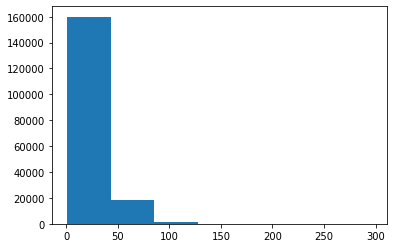

In [22]:
#distribution of lenghts 
import matplotlib.pyplot as plt
plt.hist(sentences_lens,bins=7);

In [23]:
#95% of lens sentences 
output_seq_len=int(np.percentile(sentences_lens,95) )
output_seq_len



55

In [24]:
max_tokens=68000

In [25]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens=max_tokens,output_sequence_length=55)

In [26]:
text_vectorizer.adapt(train_sentences)

In [27]:
import random
random_sentence=random.choice(train_sentences)
random_sentence

'pain scores on coughing were significantly lower in kiv and kep than in s at @ and @ hours , but there were no differences afterwards .'

In [28]:
print(len(random_sentence.split()))
print(text_vectorizer([random_sentence]))


27
tf.Tensor(
[[   65   119    18  6010     9    39   105     5 37563     3 30501    42
      5   130    15     3   227    72    61     9    33   102  7945     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)


In [29]:
rct_20_metadata=text_vectorizer.get_vocabulary()
rct_20_metadata[:10]

['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']

In [30]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [31]:
from tensorflow.keras import layers 

In [32]:
token_embedding=layers.Embedding(input_dim=len(rct_20_metadata),
                                 output_dim=128,
                                 mask_zero=True,
                                 name="token_embedding")

In [33]:
token_embedding(text_vectorizer([random_sentence]))

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[-0.01288118, -0.01408929, -0.02060199, ...,  0.04858056,
          0.04402998,  0.01107426],
        [-0.015431  ,  0.03019955, -0.01160563, ..., -0.04043001,
          0.03498732, -0.03114381],
        [ 0.01673779, -0.01029347,  0.02204304, ...,  0.01161731,
         -0.00353445,  0.00436336],
        ...,
        [-0.02387685,  0.00645881, -0.04710965, ..., -0.03969952,
          0.013058  , -0.00452646],
        [-0.02387685,  0.00645881, -0.04710965, ..., -0.03969952,
          0.013058  , -0.00452646],
        [-0.02387685,  0.00645881, -0.04710965, ..., -0.03969952,
          0.013058  , -0.00452646]]], dtype=float32)>

In [34]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
validation_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_label_one_hot))
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [35]:
#turn the tensorflow datasets into prefetched data batches

train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
validation_dataset=validation_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

**MOdel 1 : Convlutional 1D**

In [36]:
tf.random.set_seed(42)

inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
x=token_embedding(text_vectors)

x=layers.Conv1D(activation="relu",kernel_size=5,filters=64,padding="same")(x)
x=layers.GlobalAvgPool1D()(x)
outputs=layers.Dense(5,activation="softmax")(x)
model_1=tf.keras.models.Model(inputs,outputs,name="model_1_Conv1D")

model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [37]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), 
                              epochs=3,
                              validation_data=validation_dataset,
                              validation_steps=int(0.1 * len(validation_dataset))) 

Epoch 1/3
562/562 [==============================] - 13s 9ms/step - loss: 0.9151 - accuracy: 0.6363 - val_loss: 0.6906 - val_accuracy: 0.7407
Epoch 2/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6669 - accuracy: 0.7511 - val_loss: 0.6372 - val_accuracy: 0.7706
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6301 - accuracy: 0.7684 - val_loss: 0.6047 - val_accuracy: 0.7803


In [38]:
model_1.evaluate(validation_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.6104 - accuracy: 0.7823


[0.6104229688644409, 0.7823050618171692]

In [39]:
model_1_probs=model_1.predict(validation_dataset)


945/945 [==============================] - 2s 2ms/step


In [40]:
model_1_preds=tf.argmax(model_1_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [41]:
model_1_results=calculate_results(val_labels_encoded,model_1_preds)
model_1_results

{'accuracy': 78.23050443532371,
 'precision': 0.7790521473359211,
 'recall': 0.7823050443532371,
 'f1': 0.7801848206084175}

**USE Feature extraction**

In [42]:
import tensorflow_hub as hub 
tf_hub_embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      trainable=False,
                                      name="universal_sentence_encoder")

In [43]:
inputs=layers.Input(shape=[],dtype=tf.string)
x=tf_hub_embedding_layer(inputs)
x=layers.Dense(128,activation="relu")(x)
outputs=layers.Dense(5,activation="softmax")(x)

model_2=tf.keras.models.Model(inputs,outputs,name="universal_sentence_encoder_f_extraction")



In [44]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [45]:
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=validation_dataset,
            validation_steps=int(0.1 * len(validation_dataset)))

Epoch 1/3
562/562 [==============================] - 11s 13ms/step - loss: 0.9158 - accuracy: 0.6501 - val_loss: 0.7964 - val_accuracy: 0.6928
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7691 - accuracy: 0.7006 - val_loss: 0.7557 - val_accuracy: 0.7074
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7542 - accuracy: 0.7104 - val_loss: 0.7411 - val_accuracy: 0.7134


In [46]:
model_2_pred_probs = model_2.predict(validation_dataset)
model_2_pred_probs

945/945 [==============================] - 9s 9ms/step


array([[4.5274672e-01, 3.4450680e-01, 2.0096998e-03, 1.9318466e-01,
        7.5520920e-03],
       [3.8309917e-01, 4.6551138e-01, 3.7377984e-03, 1.4414001e-01,
        3.5116093e-03],
       [2.2072272e-01, 1.5240633e-01, 1.7876714e-02, 5.7220829e-01,
        3.6785904e-02],
       ...,
       [1.6233051e-03, 6.1517749e-03, 5.3988319e-02, 8.2846574e-04,
        9.3740815e-01],
       [3.6194313e-03, 5.0569218e-02, 2.1586414e-01, 1.3745052e-03,
        7.2857267e-01],
       [1.5810508e-01, 2.5819233e-01, 5.0999480e-01, 7.4762683e-03,
        6.6231549e-02]], dtype=float32)

In [47]:
model_2_results=calculate_results(val_labels_encoded,tf.argmax(model_2_pred_probs,axis=1))
model_2_results

{'accuracy': 71.42857142857143,
 'precision': 0.714716771636451,
 'recall': 0.7142857142857143,
 'f1': 0.7114245247261017}

🪔 **character embedding level**

In [48]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_sentence)

'p a i n   s c o r e s   o n   c o u g h i n g   w e r e   s i g n i f i c a n t l y   l o w e r   i n   k i v   a n d   k e p   t h a n   i n   s   a t   @   a n d   @   h o u r s   ,   b u t   t h e r e   w e r e   n o   d i f f e r e n c e s   a f t e r w a r d s   .'

In [49]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]

train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [50]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len


149.3662574983337

In [51]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [52]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [54]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [55]:
char_level_embedding=layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                                      output_dim=25,
                                      mask_zero=False,
                                      name="char_embedding")


**Conv1D**

In [56]:
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_level_embedding(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [57]:
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)


In [58]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2528 - accuracy: 0.4925 - val_loss: 1.0333 - val_accuracy: 0.5864
Epoch 2/3
562/562 [==============================] - 4s 6ms/step - loss: 1.0023 - accuracy: 0.5968 - val_loss: 0.9379 - val_accuracy: 0.6330
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9246 - accuracy: 0.6388 - val_loss: 0.8718 - val_accuracy: 0.6689


In [59]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 2s 3ms/step


array([[0.12000638, 0.42962065, 0.14080048, 0.20913163, 0.10044091],
       [0.18487194, 0.45185876, 0.04306712, 0.25116262, 0.06903953],
       [0.1401256 , 0.24543516, 0.12605691, 0.39717472, 0.09120761],
       ...,
       [0.02227501, 0.04662595, 0.3386175 , 0.05172887, 0.54075265],
       [0.02995927, 0.07296674, 0.5299893 , 0.03621885, 0.33086583],
       [0.26824966, 0.5064648 , 0.11047538, 0.09886731, 0.01594281]],
      dtype=float32)

In [60]:
model_3_results=calculate_results(val_labels_encoded,tf.argmax(model_3_pred_probs,axis=1))
model_3_results

{'accuracy': 65.3813054415464,
 'precision': 0.6536742133121597,
 'recall': 0.653813054415464,
 'f1': 0.6438694526157971}

**HYbrid Model** **token+character embeddings**

In [61]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_level_embedding(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

token_char_concatenate=layers.Concatenate(name="token_char_hybrid")([token_model.output,char_model.output])

combined_dropout=layers.Dropout(0.5)(token_char_concatenate)
combined_dense=layers.Dense(200,activation="relu")(combined_dropout)
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes,activation="softmax")(final_dropout)

model_4=tf.keras.models.Model(inputs=[token_model.input,char_model.input],outputs=output_layer,name="model_4_char_token_embedding")


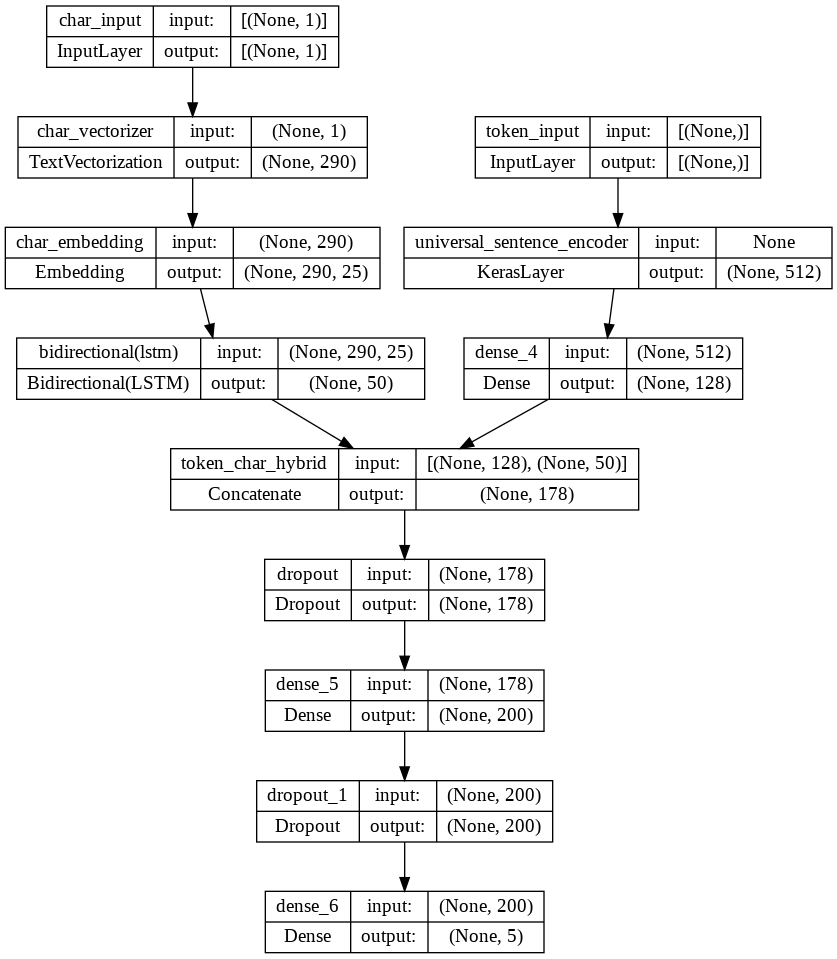

In [62]:
from tensorflow.keras.utils import plot_model

plot_model(model_4,show_shapes=True)

In [63]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

🔑 **combine char and token datasets** 

In [64]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))
train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

validation_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
validation_char_token_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
validation_char_token_dataset=tf.data.Dataset.zip((validation_char_token_data,validation_char_token_labels))
validation_char_token_dataset=validation_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [65]:
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=validation_char_token_dataset,
                              validation_steps=int(0.1 * len(validation_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 25s 35ms/step - loss: 0.9687 - accuracy: 0.6146 - val_loss: 0.7814 - val_accuracy: 0.6945
Epoch 2/3
562/562 [==============================] - 18s 32ms/step - loss: 0.7898 - accuracy: 0.6932 - val_loss: 0.7141 - val_accuracy: 0.7294
Epoch 3/3
562/562 [==============================] - 19s 33ms/step - loss: 0.7636 - accuracy: 0.7092 - val_loss: 0.6829 - val_accuracy: 0.7400


In [66]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(validation_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 20s 20ms/step


array([[3.72386336e-01, 4.40652430e-01, 4.51773172e-03, 1.74492165e-01,
        7.95132201e-03],
       [2.71771133e-01, 5.24422407e-01, 5.22035221e-03, 1.96504027e-01,
        2.08202936e-03],
       [3.15280557e-01, 1.85839385e-01, 5.94983920e-02, 3.93469006e-01,
        4.59126532e-02],
       ...,
       [4.62662545e-04, 4.68626386e-03, 3.56200524e-02, 1.18320684e-04,
        9.59112704e-01],
       [6.58492791e-03, 6.42526597e-02, 1.97931573e-01, 3.18560284e-03,
        7.28045225e-01],
       [2.74695814e-01, 3.69054914e-01, 2.77712911e-01, 2.32709236e-02,
        5.52654155e-02]], dtype=float32)

In [67]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [68]:
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.53700516351118,
 'precision': 0.7355363800788409,
 'recall': 0.7353700516351118,
 'f1': 0.7322913574642754}

**transfer learning + token + char+ positional embeding** **Feature engineering**

In [69]:
train_df.line_number.value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

In [70]:
train_line_number_one_hot=tf.one_hot(train_df.line_number.to_numpy(),depth=15)
val_line_number_one_hot=tf.one_hot(val_df.line_number.to_numpy(),depth=15)
test_line_numbers_one_hot=tf.one_hot(test_df.line_number.to_numpy(),depth=15)


In [71]:
train_line_number_one_hot.shape, train_line_number_one_hot[:20]


(TensorShape([180040, 15]), <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

In [72]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

In [73]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)


# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_level_embedding(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, 
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                         outputs=output_layer)

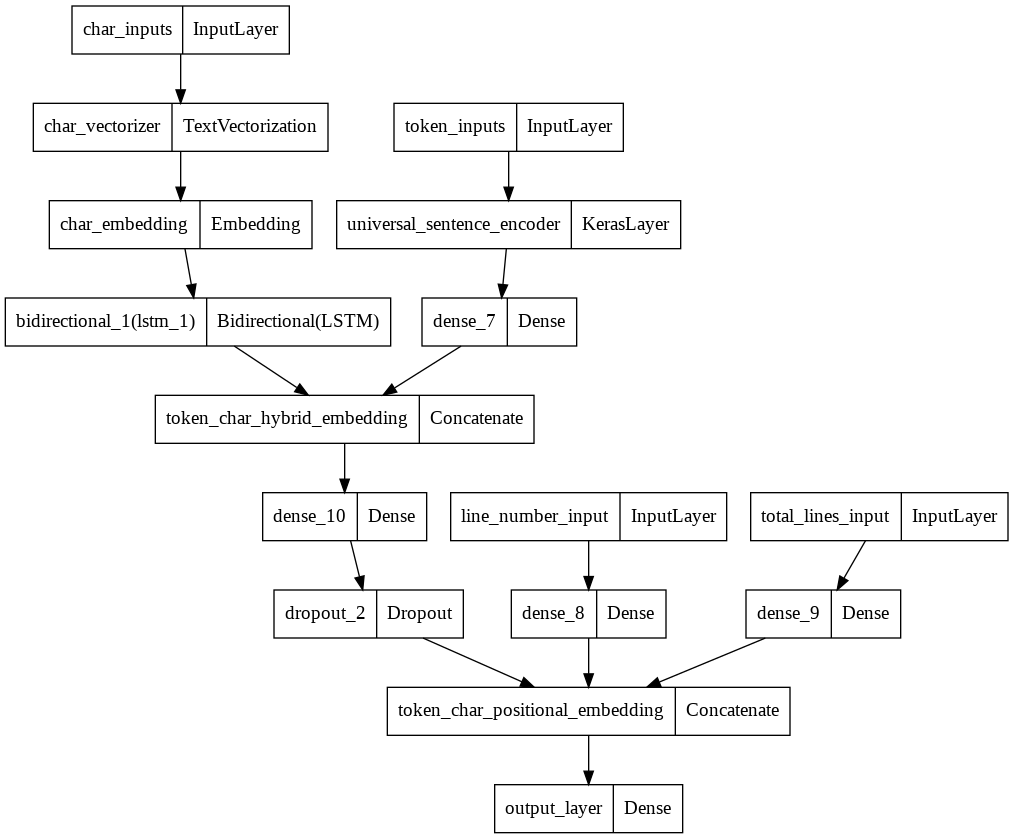

In [74]:
plot_model(model_5)

In [75]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

**tribrid dataset**

In [76]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot, 
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately


val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

train_pos_char_token_dataset, val_pos_char_token_dataset


(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [77]:
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 23s 35ms/step - loss: 1.0928 - accuracy: 0.7284 - val_loss: 0.9842 - val_accuracy: 0.8042
Epoch 2/3
562/562 [==============================] - 19s 33ms/step - loss: 0.9664 - accuracy: 0.8135 - val_loss: 0.9499 - val_accuracy: 0.8305
Epoch 3/3
562/562 [==============================] - 19s 34ms/step - loss: 0.9493 - accuracy: 0.8238 - val_loss: 0.9379 - val_accuracy: 0.8295


In [78]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 21s 21ms/step


array([[0.513568  , 0.10817456, 0.01231237, 0.3471144 , 0.01883061],
       [0.5231554 , 0.09845135, 0.05245343, 0.3147011 , 0.01123871],
       [0.3053336 , 0.11716668, 0.12827164, 0.38945422, 0.0597739 ],
       ...,
       [0.03579915, 0.1007814 , 0.0332269 , 0.02834713, 0.8018454 ],
       [0.03032241, 0.2899365 , 0.07339045, 0.02454598, 0.58180463],
       [0.2334716 , 0.6012272 , 0.0861765 , 0.03344185, 0.04568283]],
      dtype=float32)

In [79]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [80]:
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 83.23513835562028,
 'precision': 0.8312175301296403,
 'recall': 0.8323513835562029,
 'f1': 0.8313166166101196}

## compare models results

In [107]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.230504,0.779052,0.782305,0.780185
pretrained_token_embed,71.428571,0.714717,0.714286,0.711425
custom_char_embed_conv1d,65.381305,0.653674,0.653813,0.643869
hybrid_char_token_embed,73.537005,0.735536,0.735370,0.732291
tribrid_pos_char_token_embed,83.235138,0.831218,0.832351,0.831317


In [108]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100


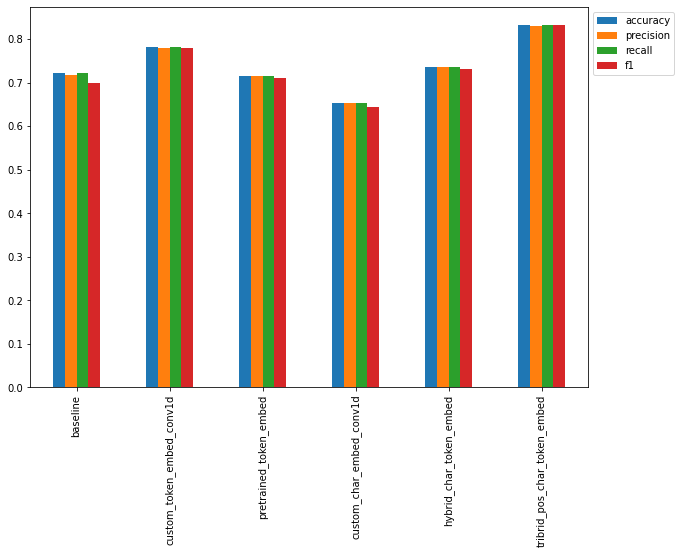

In [109]:
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

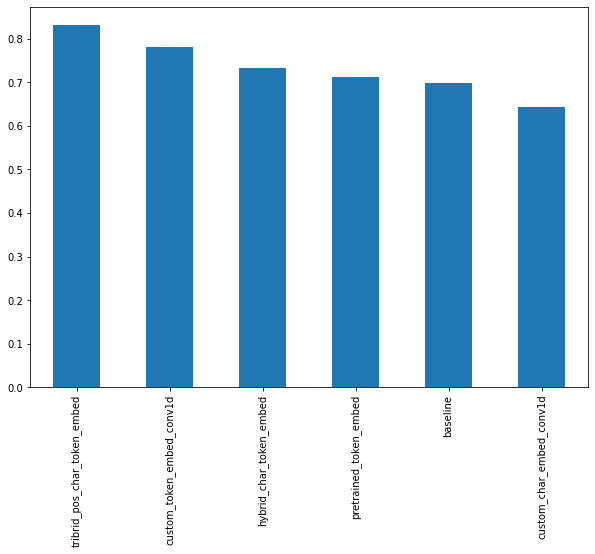

In [110]:
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

## random exemple prediction

In [111]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json


--2022-11-15 17:38:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json.1’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2022-11-15 17:38:01 (65.6 MB/s) - ‘skimlit_example_abstracts.json.1’ saved [6737/6737]



In [112]:
import json

In [113]:
with open("skimlit_example_abstracts.json","r") as f :
  wild_abstracts=json.load(f)
wild_abstracts

[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [114]:
wild_abstracts_df=pd.DataFrame(wild_abstracts)
wild_abstracts_df

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [115]:
from spacy.lang.en import English
nlp = English() 
sentencizer = nlp.create_pipe("sentencizer") 
nlp.add_pipe('sentencizer') 
doc = nlp(wild_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] 
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [116]:
total_lines_in_sample = len(abstract_lines)

sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [117]:
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15) 
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [118]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [119]:
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars


['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [120]:
%%time
test_abstract_pred_probs = model_5.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 0s 39ms/step
CPU times: user 85 ms, sys: 11.3 ms, total: 96.3 ms
Wall time: 83.9 ms


array([[0.26536787, 0.13957863, 0.01686009, 0.54698557, 0.03120791],
       [0.07901826, 0.03561217, 0.72137547, 0.09639832, 0.06759578],
       [0.11467636, 0.08024318, 0.47264034, 0.22084409, 0.11159609],
       [0.08913032, 0.17466442, 0.5471776 , 0.07296047, 0.11606716],
       [0.04561093, 0.11816696, 0.41794497, 0.04480321, 0.37347394],
       [0.03217388, 0.1238634 , 0.5817832 , 0.04535974, 0.21681985],
       [0.02420696, 0.18488309, 0.0638623 , 0.02334026, 0.7037074 ],
       [0.01606843, 0.15960224, 0.26358697, 0.03051951, 0.5302229 ]],
      dtype=float32)

In [121]:
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 2, 2, 4, 4])>

In [122]:
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [123]:
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
METHODS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


##test on ground truth labels (test dataset)

*italicized text*


In [124]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_label_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [125]:
test_pred_probs = model_5.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 20s 21ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 0, 2, 2, 4, 4, 4, 1, 1, 0])>

In [126]:
model_5_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
model_5_test_results

{'accuracy': 82.75095404015265,
 'precision': 0.8260723852205509,
 'recall': 0.8275095404015265,
 'f1': 0.8264408776110391}

In [134]:
# $ pip install -q tf-nightly # in case the model couldn't be saved in an H5 format( tensorflow 2.10.0 doesn't support this yet )

**Find the most wrong predictions**

In [135]:
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 11.8 s, sys: 1.02 s, total: 12.8 s
Wall time: 11.2 s


['OBJECTIVE',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS

In [137]:
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(5)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,9,OBJECTIVE,0.489147,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,9,BACKGROUND,0.334676,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,9,METHODS,0.801611,False
3,RESULTS,survival analyses were used to assess the asso...,3,9,METHODS,0.686383,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,9,RESULTS,0.707234,True


In [138]:
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,7,METHODS,0.935394,False
16347,BACKGROUND,to evaluate the effects of the lactic acid bac...,0,13,OBJECTIVE,0.935350,False
8545,METHODS,pretest-posttest .,1,12,BACKGROUND,0.931960,False
2388,RESULTS,the primary endpoint is the cumulative three-y...,4,14,METHODS,0.931275,False
3573,RESULTS,a cluster randomised trial was implemented wit...,3,17,METHODS,0.925787,False
...,...,...,...,...,...,...,...
9871,RESULTS,secondary endpoints were each component of the...,3,9,METHODS,0.839967,False
26452,METHODS,"in total , @ patients were recruited .",7,15,RESULTS,0.839734,False
23019,BACKGROUND,the intervention was implemented in a cluster ...,3,14,METHODS,0.839545,False
12159,METHODS,"no pain was reported in the saffron group , wh...",10,13,RESULTS,0.839408,False
